----
## **<font color="crimson"> Ya está ok</font>**

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install toolz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install netcdf4

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install h5netcdf 

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install cfgrib


Note: you may need to restart the kernel to use updated packages.


In [9]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature

### **<font color="Purple"> Datos de HadGEM3</font>**

##### **<font color="olive"> Índice >1 </font>**

In [10]:
# idx_p_file = 'datasetsok/zg5002_idx_p.nc' 
idx_p_file = 'datasetsok/zg500_idx_std+.nc' 

In [11]:
idxp_ds=  xr.open_dataset(idx_p_file)
idxp_gph = idxp_ds['zg500']

In [12]:
idxp_gph_vals = idxp_gph.mean(dim='time') #ya se puede mapear

In [13]:
idxp_gph_season =idxp_gph.groupby(idxp_gph.time.dt.season).mean(dim='time') #DJF
idxp_gph_djf = idxp_gph_season[0] #ya puedo mapear

##### **<font color="olive"> Índice <-1 </font>**

In [14]:
# idx_n_file = 'datasets/zg5002_idx_n.nc' 
idx_n_file = 'datasetsok/zg500_idx_std-.nc' #no usa el detrend

In [15]:
idxn_ds=  xr.open_dataset(idx_n_file)
idxn_gph = idxn_ds['zg500']

In [16]:
idxp_gph["time"] = idxp_gph.time.dt.floor("D") #para quitarle los nanosegundos y solo tener YYYY-MM-DD

In [17]:
idxn_gph_vals = idxn_gph.mean(dim='time') #ya se puede mapear

In [18]:
idxn_gph_season =idxn_gph.groupby(idxn_gph.time.dt.season).mean(dim='time') #DJF
idxn_gph_djf = idxn_gph_season[0] #ya puedo mapear

##### **<font color="olive"> Viento </font>**

##### Climatología diaria

In [19]:
file_uHG = 'datasetsok/anomalias_day_uHG.nc'
anomaliasday_u = xr.open_dataset(file_uHG)
anomaliasday_u['time'] = anomaliasday_u.time.dt.floor("D") 

In [20]:
file_vHG = 'datasetsok/anomalias_day_vHG.nc'
anomaliasday_v = xr.open_dataset(file_vHG)
anomaliasday_v['time'] = anomaliasday_v.time.dt.floor("D") 

#### **<font color="olive"> Viento e índice >1 (con valores de gph) </font>**

##### **<font color="pink"> Viento u </font>**

In [21]:
# uHG200y idx_gph son dataArrays, necesito que u_ds se quede solo con la dimensión time de idx_gph

In [22]:
missing_times = np.setdiff1d(idxp_gph.time.values, anomaliasday_u.time.values)
len(missing_times)

0

In [23]:
u_idxp=anomaliasday_u.sel(time=idxp_gph.time.values)
u_idxp = u_idxp['ua']

In [47]:
#promedio anual y DJF pero ya sobre el campo que solo tiene fechas de indice positivo
u_idxp_vals = u_idxp.mean(dim='time') #ANUAL
u_idxp_season = u_idxp.groupby(u_idxp.time.dt.season).mean(dim='time') #DJF
u_idxp_DJF = u_idxp_season[0] #ya se puede mapear

In [25]:
# u_idxp.to_netcdf('datasetsok/uHG_idx_std2+.nc')

##### **<font color="pink"> Viento v </font>**

In [26]:
missing_times = np.setdiff1d(idxp_gph.time.values, anomaliasday_v.time.values)
len(missing_times)

0

In [27]:
v_idxp=anomaliasday_v.sel(time=idxp_gph.time.values)
v_idxp = v_idxp['va']
v_idxp 

<xarray.DataArray 'va' (time: 3837, lat: 37, lon: 37)> Size: 21MB
[5252853 values with dtype=float32]
Coordinates:
  * lat        (lat) float64 296B 5.0 6.25 7.5 8.75 ... 46.25 47.5 48.75 50.0
  * lon        (lon) float64 296B 228.8 230.6 232.5 234.4 ... 292.5 294.4 296.2
  * time       (time) object 31kB 1979-02-29 00:00:00 ... 2014-12-27 00:00:00
    plev       (time) float64 31kB ...
    dayofyear  (time) int64 31kB ...

In [31]:
#promedio anual y DJF pero ya sobre el campo que solo tiene fechas de indice positivo
v_idxp_vals = v_idxp.mean(dim='time') #ANUAL
v_idxp_season = v_idxp.groupby(v_idxp.time.dt.season).mean(dim='time') #DJF
u_idxp_DJF = u_idxp_season[0] #ya se puede mapear

In [28]:
# v_idxp.to_netcdf('datasetsok/vHG_idx_std2+.nc')

##### **<font color="olive"> Viento e índice <-1 (con valores de gph) </font>**

##### **<font color="pink"> Viento u </font>**

In [29]:
missing_times = np.setdiff1d(idxn_gph.time.values, anomaliasday_u.time.values)
len(missing_times)

0

In [30]:
u_idxn=anomaliasday_u.sel(time=idxn_gph.time.values)
u_idxn = u_idxn['ua']
u_idxn

<xarray.DataArray 'ua' (time: 3578, lat: 25, lon: 33)> Size: 12MB
[2951850 values with dtype=float32]
Coordinates:
  * time       (time) object 29kB 1979-01-07 00:00:00 ... 2014-12-30 00:00:00
  * lon        (lon) float64 264B 232.5 234.4 236.2 238.1 ... 288.8 290.6 292.5
  * lat        (lat) float64 200B 10.0 11.25 12.5 13.75 ... 37.5 38.75 40.0
    plev       (time) float64 29kB ...
    dayofyear  (time) int64 29kB ...

In [48]:
#promedio anual y DJF pero ya sobre el campo que solo tiene fechas de indice negativo
u_idxn_vals = u_idxn.mean(dim='time') #ANUAL
u_idxn_season = u_idxn.groupby(u_idxn.time.dt.season).mean(dim='time') #DJF
u_idxn_DJF = u_idxn_season[0] #ya se puede mapear

In [31]:
# u_idxn.to_netcdf('datasetsok/uHG_idx_std2-.nc')

##### **<font color="pink"> Viento v </font>**

In [32]:
missing_times = np.setdiff1d(idxn_gph.time.values, anomaliasday_v.time.values)
len(missing_times)

0

In [33]:
v_idxn=anomaliasday_v.sel(time=idxn_gph.time.values)
v_idxn = v_idxn['va']
v_idxn

<xarray.DataArray 'va' (time: 3578, lat: 37, lon: 37)> Size: 20MB
[4898282 values with dtype=float32]
Coordinates:
  * lat        (lat) float64 296B 5.0 6.25 7.5 8.75 ... 46.25 47.5 48.75 50.0
  * lon        (lon) float64 296B 228.8 230.6 232.5 234.4 ... 292.5 294.4 296.2
  * time       (time) object 29kB 1979-01-07 00:00:00 ... 2014-12-30 00:00:00
    plev       (time) float64 29kB ...
    dayofyear  (time) int64 29kB ...

In [45]:
#promedio anual y DJF pero ya sobre el campo que solo tiene fechas de indice negativo
v_idxn_vals = v_idxn.mean(dim='time') #ANUAL
v_idxn_season = v_idxn.groupby(v_idxn.time.dt.season).mean(dim='time') #DJF
u_idxn_DJF = u_idxn_season[0] #ya se puede mapear

In [34]:
# v_idxn.to_netcdf('datasetsok/vHG_idx_std2-.nc')

In [41]:
# idxp_gph_vals = idxp_gph_vals/g
# idxp_gph_djf = idxp_gph_djf/g
# idxn_gph_vals = idxn_gph_vals/g
# idxn_gph_djf = idxn_gph_djf/g

In [45]:
print(idxp_gph_vals.max())
print(idxp_gph_djf.max())
print(idxn_gph_vals.max())
print(idxn_gph_djf.max())

<xarray.DataArray 'zg500' ()> Size: 8B
array(62.59122849)
<xarray.DataArray 'zg500' ()> Size: 8B
array(69.74456787)
Coordinates:
    season   <U3 12B 'DJF'
<xarray.DataArray 'zg500' ()> Size: 8B
array(114.67967987)
<xarray.DataArray 'zg500' ()> Size: 8B
array(126.88227081)
Coordinates:
    season   <U3 12B 'DJF'


In [47]:
print(u_idxp_vals.max())
print(u_idxn_vals.max())
print(u_idxp_DJF.max())
print(u_idxn_DJF.max())

<xarray.DataArray 'ua' ()> Size: 8B
array(9.53978252)
<xarray.DataArray 'ua' ()> Size: 8B
array(7.62270927)
<xarray.DataArray 'ua' ()> Size: 8B
array(10.60505772)
Coordinates:
    season   <U3 12B 'DJF'
<xarray.DataArray 'ua' ()> Size: 8B
array(9.87446594)
Coordinates:
    season   <U3 12B 'DJF'


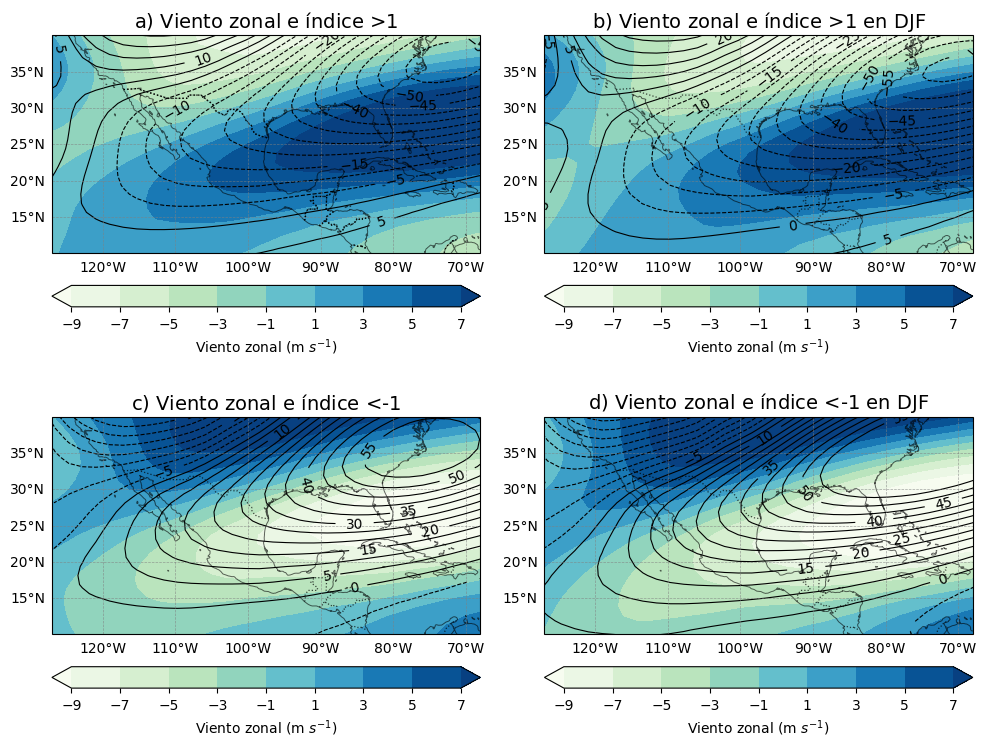

In [49]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8), subplot_kw={'projection': ccrs.PlateCarree()})#, constrained_layout=True)
plt.subplots_adjust(wspace=0.2, hspace=0.45)
axs = axs.flatten()

# Subplot 1: ANUAL INDICE >1
ax = axs[0]
ax.add_feature(cfeature.BORDERS, linestyle=':',linewidth=1)
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(u_idxp_vals.lon,u_idxp_vals.lat,u_idxp_vals,levels=np.arange(-9,9,2),cmap='GnBu',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_vals.lon,idxp_gph_vals.lat,idxp_gph_vals, levels=np.arange(-60, 60, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('a$)$ Viento zonal e índice >1', fontsize=14)

# Subplot 2: ANUAL ÍNDICE <-1
ax = axs[2]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(u_idxn_vals.lon,u_idxn_vals.lat,u_idxn_vals,levels=np.arange(-9,9,2),cmap='GnBu',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_gph_vals.lon,idxn_gph_vals.lat,idxn_gph_vals, levels=np.arange(-60, 60, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('c$)$ Viento zonal e índice <-1', fontsize=14)

# Subplot 3: Viento zonal promedio durante eventos CAO - ERA-5
ax = axs[1]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(u_idxp_DJF.lon,u_idxp_DJF.lat,u_idxp_DJF,levels=np.arange(-9,9,2),cmap='GnBu',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxp_gph_djf.lon,idxp_gph_djf.lat,idxp_gph_djf, levels=np.arange(-60, 60, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('b$)$ Viento zonal e índice >1 en DJF', fontsize=14)

# Subplot 4: Anomalía de viento zonal en DJF - ERA-5
ax = axs[3]
ax.coastlines(linewidth=0.7,alpha=0.6)
cs=ax.contourf(u_idxn_DJF.lon,u_idxn_DJF.lat,u_idxn_DJF,levels=np.arange(-9,9,2),cmap='GnBu',extend='both',transform=ccrs.PlateCarree())
cc = ax.contour(idxn_gph_djf.lon,idxn_gph_djf.lat,idxn_gph_djf, levels=np.arange(-60, 60, 5), colors='k', linewidths=0.8, transform=ccrs.PlateCarree())
ax.clabel(cc, cc.levels, inline=True, fontsize=10)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.9, alpha=0.7)
ax.set_extent([233, 292, 10, 40], crs=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color='gray', alpha=0.7, linestyle='--', linewidth=0.5)
gl.top_labels = gl.right_labels = False
cbar = fig.colorbar(cs, ax=ax, orientation='horizontal', fraction=0.1, pad=0.1)
cbar.ax.set_xlabel('Viento zonal (m $s^{-1}$)', fontsize=10)
ax.set_title('d$)$ Viento zonal e índice <-1 en DJF', fontsize=14)

# plt.show()
plt.tight_layout()
plt.subplots_adjust(top=.95)
# plt.suptitle('Viento zonal a 200 hPa e índice PNA', fontsize=14, color="k", fontstyle='italic', fontweight='bold')

plt.savefig('figs/vientoyPNA_HG')